# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading Dataset

## Get Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Flatten Dataset

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

Here, we just have the training and test sets, hence we must build a validation set from the test set to select among different models

In [4]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of Y_train: " + str(Y_train.shape))

Shape of X_train: (60000, 784)
Shape of Y_train: (60000,)


## Building a validation set

##### Shuffle indices randomly

In [5]:
shuffle_indices = np.arange(0, X_train.shape[0])
np.random.shuffle(shuffle_indices)

X_train = X_train[shuffle_indices, :]
Y_train = Y_train[shuffle_indices]

##### We would take the first 5000 images of the training set (after shuffling it) to be the validation set.

In [6]:
X_val = X_train[:5000]
Y_val = Y_train[:5000]

X_train = X_train[5000: ]
Y_train = Y_train[5000: ]

In [7]:
print("All the shapes: -")

print("X_train: " + str(X_train.shape))
print("Y_train: " + str(Y_train.shape))

print("X_val  : " + str(X_val.shape))
print("Y_val  : " + str(Y_val.shape))

print("X_test : " + str(X_test.shape))
print("Y_test : " + str(Y_test.shape))

All the shapes: -
X_train: (55000, 784)
Y_train: (55000,)
X_val  : (5000, 784)
Y_val  : (5000,)
X_test : (10000, 784)
Y_test : (10000,)


## Some Helper Functions

In [8]:
def plot_loss(loss_arr):
    plt.plot(loss_arr)
    plt.title('Loss curve')
    plt.xlabel('num iters')
    plt.ylabel('Loss value')
    plt.show()

def plot_acc(acc_arr):
    plt.plot(acc_arr)
    plt.title('Accuracy curve')
    plt.xlabel('num iters')
    plt.ylabel('Accuracy value')
    plt.show()

# Building Models

Now, we would build multiple models and compare them on the basis of their validation accuracy

## Models - I: Unnormalized vs Normalized

### Model 1: Using Unnormalized data

#### Hyperparameters

In [9]:
num_hidden_units = 32
output_size = 10
learning_rate = 0.1
num_iters = 100

#### Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [12]:
info = model.fit(X_train.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 1.3730 - acc: 0.5561
Epoch 2/100
55000/55000 - 2s - loss: 1.0466 - acc: 0.6493
Epoch 3/100
55000/55000 - 2s - loss: 1.0566 - acc: 0.6465
Epoch 4/100
55000/55000 - 2s - loss: 1.0244 - acc: 0.6527
Epoch 5/100
55000/55000 - 2s - loss: 1.0163 - acc: 0.6579
Epoch 6/100
55000/55000 - 2s - loss: 0.9929 - acc: 0.6739
Epoch 7/100
55000/55000 - 2s - loss: 0.8991 - acc: 0.7017
Epoch 8/100
55000/55000 - 2s - loss: 0.9009 - acc: 0.7111
Epoch 9/100
55000/55000 - 2s - loss: 0.8599 - acc: 0.7216
Epoch 10/100
55000/55000 - 2s - loss: 0.8995 - acc: 0.6999
Epoch 11/100
55000/55000 - 2s - loss: 0.7731 - acc: 0.7561
Epoch 12/100
55000/55000 - 2s - loss: 0.8525 - acc: 0.7127
Epoch 13/100
55000/55000 - 2s - loss: 0.8420 - acc: 0.7263
Epoch 14/100
55000/55000 - 2s - loss: 0.8320 - acc: 0.7272
Epoch 15/100
55000/55000 - 2s - loss: 0.7432 - acc: 0.7666
Epoch 16/100
55000/55000 - 2s - loss: 0.7464 - acc: 0.7608
Epoch 17/100
55000/55000 - 2s - loss: 0.7755 - acc: 0.7474
Epoch 

In [13]:
loss_arr = info.history['loss']
acc_arr = info.history['acc']

#### Plotting Loss

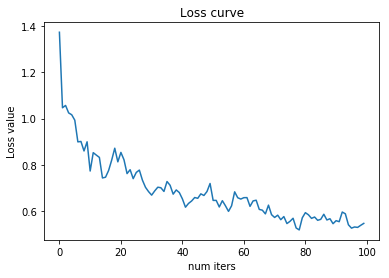

In [14]:
plot_loss(loss_arr)

#### Plotting Accuracy

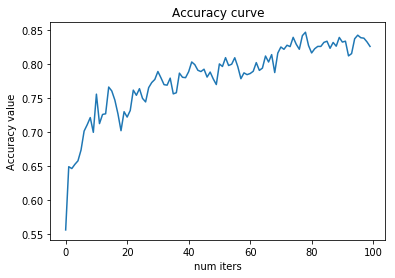

In [15]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [16]:
val_loss, val_acc = model.evaluate(X_val.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 26us/sample - loss: 0.5707 - acc: 0.8174
Validation Loss: 0.5707360449790955
Validation Accuracy: 0.8174


### Model 2: Normalized Data

#### Normalize the data

In [17]:
X_train_n = X_train / 255.
X_val_n = X_val / 255.
X_test_n = X_test / 255.

#### Model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [20]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs=num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 0.6339 - acc: 0.8519
Epoch 2/100
55000/55000 - 2s - loss: 0.3095 - acc: 0.9137
Epoch 3/100
55000/55000 - 2s - loss: 0.2591 - acc: 0.9268
Epoch 4/100
55000/55000 - 2s - loss: 0.2296 - acc: 0.9350
Epoch 5/100
55000/55000 - 2s - loss: 0.2088 - acc: 0.9411
Epoch 6/100
55000/55000 - 2s - loss: 0.1924 - acc: 0.9455
Epoch 7/100
55000/55000 - 2s - loss: 0.1798 - acc: 0.9486
Epoch 8/100
55000/55000 - 2s - loss: 0.1692 - acc: 0.9517
Epoch 9/100
55000/55000 - 2s - loss: 0.1603 - acc: 0.9544
Epoch 10/100
55000/55000 - 2s - loss: 0.1521 - acc: 0.9568
Epoch 11/100
55000/55000 - 2s - loss: 0.1457 - acc: 0.9584
Epoch 12/100
55000/55000 - 2s - loss: 0.1394 - acc: 0.9602
Epoch 13/100
55000/55000 - 2s - loss: 0.1339 - acc: 0.9623
Epoch 14/100
55000/55000 - 2s - loss: 0.1289 - acc: 0.9637
Epoch 15/100
55000/55000 - 2s - loss: 0.1244 - acc: 0.9649
Epoch 16/100
55000/55000 - 2s - loss: 0.1204 - acc: 0.9662
Epoch 17/100
55000/55000 - 2s - loss: 0.1167 - acc: 0.9673
Epoch 

In [21]:
loss_arr = info.history['loss']
acc_arr = info.history['acc']

#### Plotting Loss

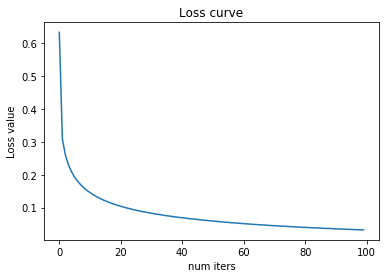

In [22]:
plot_loss(loss_arr)

#### Plotting Accuracy

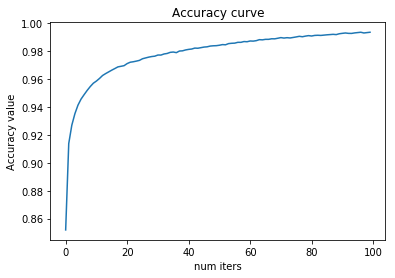

In [23]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [24]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 30us/sample - loss: 0.1341 - acc: 0.9596
Validation Loss: 0.13405590852051974
Validation Accuracy: 0.9596


## Summary of Models - I

1. **Model1**: Unnormalized - Loss: 0.571, Acc: 0.817
2. **Model2**: Normalized - Loss: 0.134, Acc: 0.960

We can see that after normalizing the data to be between 0 and 1, the loss had decreased from 0.571 to 0.134 and the accuracy increased from 0.817 to 0.960 when trained for the same number of iterations (100) while keeping the model as well as optimizer (SGD) same.

## Conclusion

Hence, in further models, we will be using the normalized data

## Models - II: Number of Hidden Layers

### Model 1: Number of hidden layers = 1
#### Already evaluated - Loss: 0.134, Acc: 0.960

### Model 2: Number of hidden layers = 2

#### Model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [26]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [27]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 1.1205 - acc: 0.6824
Epoch 2/100
55000/55000 - 2s - loss: 0.3779 - acc: 0.8970
Epoch 3/100
55000/55000 - 2s - loss: 0.2888 - acc: 0.9183
Epoch 4/100
55000/55000 - 2s - loss: 0.2426 - acc: 0.9307
Epoch 5/100
55000/55000 - 2s - loss: 0.2100 - acc: 0.9397
Epoch 6/100
55000/55000 - 2s - loss: 0.1867 - acc: 0.9462
Epoch 7/100
55000/55000 - 2s - loss: 0.1693 - acc: 0.9507
Epoch 8/100
55000/55000 - 2s - loss: 0.1556 - acc: 0.9553
Epoch 9/100
55000/55000 - 2s - loss: 0.1446 - acc: 0.9579
Epoch 10/100
55000/55000 - 2s - loss: 0.1352 - acc: 0.9607
Epoch 11/100
55000/55000 - 2s - loss: 0.1277 - acc: 0.9626
Epoch 12/100
55000/55000 - 2s - loss: 0.1208 - acc: 0.9644
Epoch 13/100
55000/55000 - 2s - loss: 0.1147 - acc: 0.9667
Epoch 14/100
55000/55000 - 2s - loss: 0.1098 - acc: 0.9682
Epoch 15/100
55000/55000 - 2s - loss: 0.1051 - acc: 0.9693
Epoch 16/100
55000/55000 - 2s - loss: 0.1004 - acc: 0.9710
Epoch 17/100
55000/55000 - 2s - loss: 0.0969 - acc: 0.9711
Epoch 

In [28]:
loss_arr = info.history['loss']
acc_arr = info.history['acc']

#### Plotting Loss

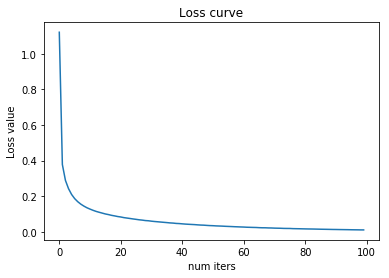

In [29]:
plot_loss(loss_arr)

#### Plotting Accuracy

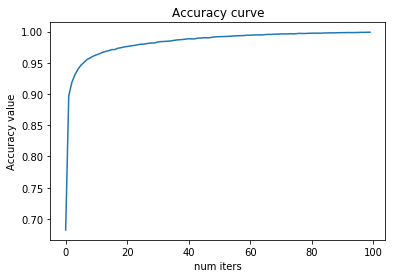

In [30]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [31]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 29us/sample - loss: 0.1440 - acc: 0.9632
Validation Loss: 0.14397144767045975
Validation Accuracy: 0.9632


### Model 3: Number of hidden layers = 3

#### Model

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [34]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 1.9751 - acc: 0.3099
Epoch 2/100
55000/55000 - 2s - loss: 0.7309 - acc: 0.7941
Epoch 3/100
55000/55000 - 2s - loss: 0.4498 - acc: 0.8765
Epoch 4/100
55000/55000 - 2s - loss: 0.3368 - acc: 0.9072
Epoch 5/100
55000/55000 - 2s - loss: 0.2650 - acc: 0.9269
Epoch 6/100
55000/55000 - 2s - loss: 0.2216 - acc: 0.9387
Epoch 7/100
55000/55000 - 2s - loss: 0.1933 - acc: 0.9456
Epoch 8/100
55000/55000 - 2s - loss: 0.1734 - acc: 0.9497
Epoch 9/100
55000/55000 - 2s - loss: 0.1587 - acc: 0.9539
Epoch 10/100
55000/55000 - 2s - loss: 0.1459 - acc: 0.9577
Epoch 11/100
55000/55000 - 2s - loss: 0.1363 - acc: 0.9604
Epoch 12/100
55000/55000 - 2s - loss: 0.1271 - acc: 0.9630
Epoch 13/100
55000/55000 - 2s - loss: 0.1203 - acc: 0.9651
Epoch 14/100
55000/55000 - 2s - loss: 0.1121 - acc: 0.9671
Epoch 15/100
55000/55000 - 2s - loss: 0.1067 - acc: 0.9681
Epoch 16/100
55000/55000 - 2s - loss: 0.1011 - acc: 0.9705
Epoch 17/100
55000/55000 - 2s - loss: 0.0967 - acc: 0.9718
Epoch 

In [35]:
loss_arr = info.history['loss']
acc_arr = info.history['acc']

#### Plotting Loss

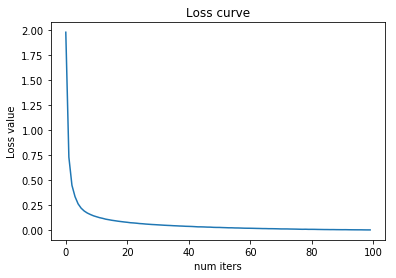

In [36]:
plot_loss(loss_arr)

#### Plotting Accuracy

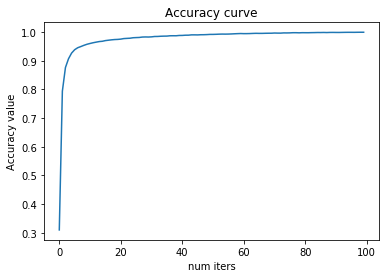

In [37]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [38]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 31us/sample - loss: 0.1771 - acc: 0.9644
Validation Loss: 0.17707076184735634
Validation Accuracy: 0.9644


## Summary of Models - II

1. **Model1**: 1 Hidden Layer - Loss: 0.134, Acc: 0.960
2. **Model2**: 2 Hidden Layers - Loss: 0.144, Acc: 0.963
2. **Model3**: 3 Hidden Layers - Loss: 0.177, Acc: 0.964

We can see that when we have increased the number of hidden layers to 2, the loss had increased from 0.134 to 0.144 and the accuracy increased from 0.960 to 0.963 and when we had increased the hidden layers to 3, the loss had increased to 0.177, while the accuracy increased to 0.964. Hence, since we observe a pattern - loss increases and accuracy increases in this case, it would be better if we chose the intermediate model - that is the one with 2 hidden layers.

## Conclusion

Since the model with 2 hidden layers gave us intermediate results in terms of both loss and accuracy, we will be selecting among further models which have 2 hidden layers

## Models - III: Learning Rate

### Model 1: Learning rate = 0.1
#### Already evaluated - Loss: 0.144, Acc: 0.963

### Model 2: Learning rate = 0.001

#### Hyperparameters (that have changed)

In [39]:
learning_rate = 0.001

#### Model

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [41]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [42]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 2.3190 - acc: 0.1051
Epoch 2/100
55000/55000 - 2s - loss: 2.2834 - acc: 0.1346
Epoch 3/100
55000/55000 - 2s - loss: 2.2714 - acc: 0.1930
Epoch 4/100
55000/55000 - 2s - loss: 2.2597 - acc: 0.2349
Epoch 5/100
55000/55000 - 2s - loss: 2.2471 - acc: 0.2637
Epoch 6/100
55000/55000 - 2s - loss: 2.2333 - acc: 0.2765
Epoch 7/100
55000/55000 - 2s - loss: 2.2181 - acc: 0.2977
Epoch 8/100
55000/55000 - 2s - loss: 2.2011 - acc: 0.3207
Epoch 9/100
55000/55000 - 2s - loss: 2.1822 - acc: 0.3348
Epoch 10/100
55000/55000 - 2s - loss: 2.1611 - acc: 0.3507
Epoch 11/100
55000/55000 - 2s - loss: 2.1377 - acc: 0.3694
Epoch 12/100
55000/55000 - 2s - loss: 2.1120 - acc: 0.3763
Epoch 13/100
55000/55000 - 2s - loss: 2.0838 - acc: 0.3906
Epoch 14/100
55000/55000 - 2s - loss: 2.0535 - acc: 0.4064
Epoch 15/100
55000/55000 - 4s - loss: 2.0212 - acc: 0.4182
Epoch 16/100
55000/55000 - 2s - loss: 1.9871 - acc: 0.4386
Epoch 17/100
55000/55000 - 2s - loss: 1.9517 - acc: 0.4490
Epoch 

#### Plotting Loss

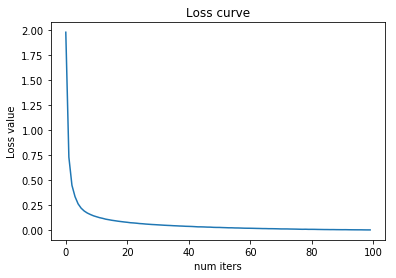

In [43]:
plot_loss(loss_arr)

#### Plotting Accuracy

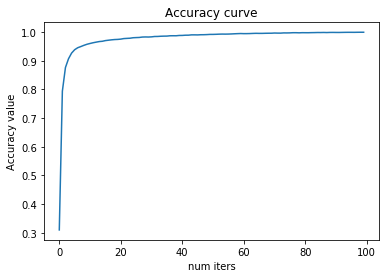

In [44]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [45]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 31us/sample - loss: 0.4958 - acc: 0.8758
Validation Loss: 0.4957890716552734
Validation Accuracy: 0.8758


### Model 3: Learning rate = 0.0001

#### Hyperparameters (that have changed)

In [46]:
learning_rate = 0.0001

#### Model

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [49]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 2.4965 - acc: 0.1254
Epoch 2/100
55000/55000 - 2s - loss: 2.4397 - acc: 0.1138
Epoch 3/100
55000/55000 - 2s - loss: 2.3999 - acc: 0.1055
Epoch 4/100
55000/55000 - 2s - loss: 2.3714 - acc: 0.1018
Epoch 5/100
55000/55000 - 2s - loss: 2.3504 - acc: 0.1005
Epoch 6/100
55000/55000 - 2s - loss: 2.3348 - acc: 0.0995
Epoch 7/100
55000/55000 - 2s - loss: 2.3231 - acc: 0.0992
Epoch 8/100
55000/55000 - 2s - loss: 2.3142 - acc: 0.0990
Epoch 9/100
55000/55000 - 2s - loss: 2.3073 - acc: 0.1020
Epoch 10/100
55000/55000 - 2s - loss: 2.3019 - acc: 0.1119
Epoch 11/100
55000/55000 - 2s - loss: 2.2978 - acc: 0.1317
Epoch 12/100
55000/55000 - 2s - loss: 2.2944 - acc: 0.1532
Epoch 13/100
55000/55000 - 2s - loss: 2.2917 - acc: 0.1685
Epoch 14/100
55000/55000 - 2s - loss: 2.2895 - acc: 0.1773
Epoch 15/100
55000/55000 - 2s - loss: 2.2876 - acc: 0.1862
Epoch 16/100
55000/55000 - 2s - loss: 2.2859 - acc: 0.1999
Epoch 17/100
55000/55000 - 2s - loss: 2.2845 - acc: 0.2219
Epoch 

#### Plotting Loss

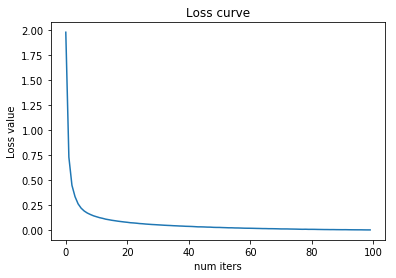

In [50]:
plot_loss(loss_arr)

#### Plotting Accuracy

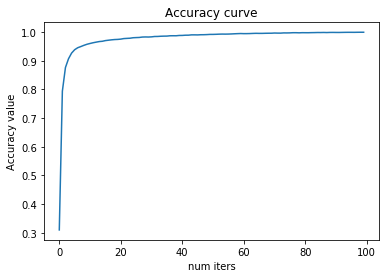

In [51]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [52]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 31us/sample - loss: 2.1723 - acc: 0.4274
Validation Loss: 2.17229538192749
Validation Accuracy: 0.4274


## Summary of Models - III

1. **Model1**: Learning Rate = 0.1 - Loss: 0.144, Acc: 0.963
2. **Model2**: Learning Rate = 0.001 - Loss: 0.496, Acc: 0.876
2. **Model3**: Learning Rate = 0.0001 - Loss: 2.172, Acc: 0.427

It is clear that a learning rate of 0.1 has given far better results than learning rates 0.001 and 0.0001. This may be explained as - since with learning rate of 0.1, the training went well, we are just slowing up the process of learning by reducing the learning rate from that value.

## Conclusion

Hence, all further models will be trained using a learning rate of 0.1

## Models - IV: Number of Hidden units per hidden layer

#### Hyperparameter (chosen above)

In [55]:
learning_rate = 0.1

### Model 1: Hidden Units = 32
#### Already evaluated - Loss: 0.144, Acc: 0.963

### Model 2: Hidden Units = 64

#### Hyperparameters (that have changed)

In [56]:
num_hidden_units = 64

#### Model

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [58]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [59]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 2s - loss: 0.9751 - acc: 0.7215
Epoch 2/100
55000/55000 - 2s - loss: 0.3449 - acc: 0.9027
Epoch 3/100
55000/55000 - 2s - loss: 0.2787 - acc: 0.9190
Epoch 4/100
55000/55000 - 2s - loss: 0.2376 - acc: 0.9304
Epoch 5/100
55000/55000 - 2s - loss: 0.2067 - acc: 0.9395
Epoch 6/100
55000/55000 - 2s - loss: 0.1818 - acc: 0.9472
Epoch 7/100
55000/55000 - 2s - loss: 0.1623 - acc: 0.9530
Epoch 8/100
55000/55000 - 2s - loss: 0.1459 - acc: 0.9571
Epoch 9/100
55000/55000 - 2s - loss: 0.1328 - acc: 0.9608
Epoch 10/100
55000/55000 - 2s - loss: 0.1217 - acc: 0.9644
Epoch 11/100
55000/55000 - 2s - loss: 0.1119 - acc: 0.9680
Epoch 12/100
55000/55000 - 2s - loss: 0.1035 - acc: 0.9706
Epoch 13/100
55000/55000 - 2s - loss: 0.0966 - acc: 0.9718
Epoch 14/100
55000/55000 - 2s - loss: 0.0904 - acc: 0.9739
Epoch 15/100
55000/55000 - 2s - loss: 0.0844 - acc: 0.9758
Epoch 16/100
55000/55000 - 2s - loss: 0.0798 - acc: 0.9770
Epoch 17/100
55000/55000 - 2s - loss: 0.0746 - acc: 0.9781
Epoch 

#### Plotting Loss

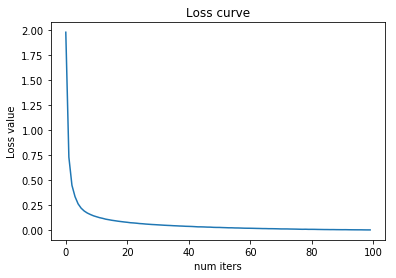

In [60]:
plot_loss(loss_arr)

#### Plotting Accuracy

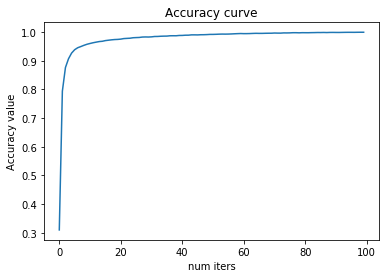

In [61]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [62]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 33us/sample - loss: 0.1082 - acc: 0.9740
Validation Loss: 0.10820856486669218
Validation Accuracy: 0.974


### Model 3: Hidden Units = 128

#### Hyperparameter (that changed)

In [63]:
num_hidden_units = 128

#### Model

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [65]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [66]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 3s - loss: 0.8950 - acc: 0.7360
Epoch 2/100
55000/55000 - 3s - loss: 0.3407 - acc: 0.9035
Epoch 3/100
55000/55000 - 3s - loss: 0.2826 - acc: 0.9182
Epoch 4/100
55000/55000 - 3s - loss: 0.2454 - acc: 0.9287
Epoch 5/100
55000/55000 - 3s - loss: 0.2154 - acc: 0.9373
Epoch 6/100
55000/55000 - 3s - loss: 0.1904 - acc: 0.9440
Epoch 7/100
55000/55000 - 3s - loss: 0.1695 - acc: 0.9508
Epoch 8/100
55000/55000 - 3s - loss: 0.1527 - acc: 0.9560
Epoch 9/100
55000/55000 - 3s - loss: 0.1387 - acc: 0.9597
Epoch 10/100
55000/55000 - 3s - loss: 0.1266 - acc: 0.9634
Epoch 11/100
55000/55000 - 3s - loss: 0.1158 - acc: 0.9662
Epoch 12/100
55000/55000 - 3s - loss: 0.1066 - acc: 0.9691
Epoch 13/100
55000/55000 - 3s - loss: 0.0988 - acc: 0.9710
Epoch 14/100
55000/55000 - 3s - loss: 0.0918 - acc: 0.9733
Epoch 15/100
55000/55000 - 3s - loss: 0.0851 - acc: 0.9751
Epoch 16/100
55000/55000 - 3s - loss: 0.0800 - acc: 0.9765
Epoch 17/100
55000/55000 - 3s - loss: 0.0749 - acc: 0.9781
Epoch 

#### Plotting Loss

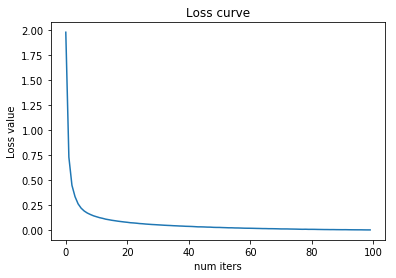

In [67]:
plot_loss(loss_arr)

#### Plotting Accuracy

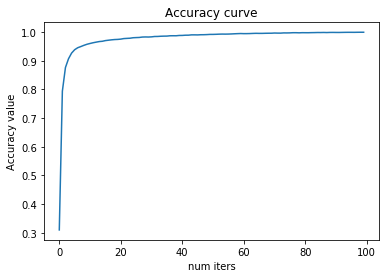

In [68]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [69]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 41us/sample - loss: 0.0812 - acc: 0.9806
Validation Loss: 0.08123220228652353
Validation Accuracy: 0.9806


## Summary of Models - IV

1. **Model1**: Number of Hidden Units = 32 - Loss: 0.144, Acc: 0.963
2. **Model2**: Number of Hidden Units = 64 - Loss: 0.108, Acc: 0.974
2. **Model3**: Number of Hidden Units = 128 - Loss: 0.081, Acc: 0.981

Clearly, it is the model with 128 hidden units in both of the hidden layers performs better than the models with 32 and 64 hidden units in both of their hidden layers. This would have occurred because when we use more hidden units, we are able to learn even more complex functions which would predict the output better.

## Conclusion

Hence, in the further models we would be using 128 hidden units in each layer.

## Models - V: Activation Functions

#### Hyperparameter (chosen above)

In [70]:
num_hidden_units = 128

### Model 1: Sigmoid
#### Already evaluated - Loss: 0.081, Acc: 0.981

### Model 2: Tanh

#### Model

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.tanh),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.tanh),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [72]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [73]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 3s - loss: 0.3084 - acc: 0.9085
Epoch 2/100
55000/55000 - 3s - loss: 0.1554 - acc: 0.9538
Epoch 3/100
55000/55000 - 3s - loss: 0.1105 - acc: 0.9665
Epoch 4/100
55000/55000 - 3s - loss: 0.0837 - acc: 0.9745
Epoch 5/100
55000/55000 - 3s - loss: 0.0674 - acc: 0.9793
Epoch 6/100
55000/55000 - 3s - loss: 0.0541 - acc: 0.9836
Epoch 7/100
55000/55000 - 3s - loss: 0.0452 - acc: 0.9864
Epoch 8/100
55000/55000 - 3s - loss: 0.0367 - acc: 0.9890
Epoch 9/100
55000/55000 - 3s - loss: 0.0300 - acc: 0.9914
Epoch 10/100
55000/55000 - 3s - loss: 0.0249 - acc: 0.9934
Epoch 11/100
55000/55000 - 3s - loss: 0.0200 - acc: 0.9950
Epoch 12/100
55000/55000 - 3s - loss: 0.0166 - acc: 0.9962
Epoch 13/100
55000/55000 - 3s - loss: 0.0133 - acc: 0.9973
Epoch 14/100
55000/55000 - 3s - loss: 0.0107 - acc: 0.9981
Epoch 15/100
55000/55000 - 3s - loss: 0.0089 - acc: 0.9986
Epoch 16/100
55000/55000 - 3s - loss: 0.0071 - acc: 0.9990
Epoch 17/100
55000/55000 - 3s - loss: 0.0055 - acc: 0.9996
Epoch 

#### Plotting Loss

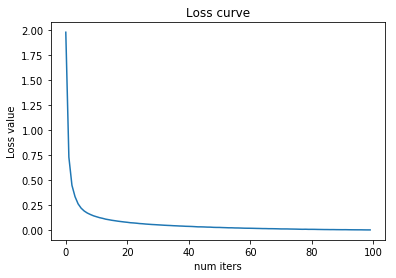

In [74]:
plot_loss(loss_arr)

#### Plotting Accuracy

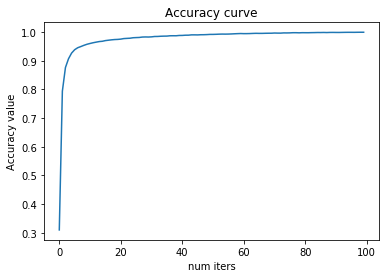

In [75]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [76]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 42us/sample - loss: 0.1001 - acc: 0.9794
Validation Loss: 0.10009093998461485
Validation Accuracy: 0.9794


### Model 3: Relu

#### Model

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [78]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [79]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 3s - loss: 0.2870 - acc: 0.9143
Epoch 2/100
55000/55000 - 3s - loss: 0.1204 - acc: 0.9640
Epoch 3/100
55000/55000 - 3s - loss: 0.0855 - acc: 0.9736
Epoch 4/100
55000/55000 - 3s - loss: 0.0651 - acc: 0.9793
Epoch 5/100
55000/55000 - 3s - loss: 0.0494 - acc: 0.9847
Epoch 6/100
55000/55000 - 3s - loss: 0.0395 - acc: 0.9881
Epoch 7/100
55000/55000 - 3s - loss: 0.0317 - acc: 0.9898
Epoch 8/100
55000/55000 - 3s - loss: 0.0251 - acc: 0.9924
Epoch 9/100
55000/55000 - 3s - loss: 0.0201 - acc: 0.9938
Epoch 10/100
55000/55000 - 3s - loss: 0.0150 - acc: 0.9958
Epoch 11/100
55000/55000 - 3s - loss: 0.0131 - acc: 0.9963
Epoch 12/100
55000/55000 - 3s - loss: 0.0092 - acc: 0.9977
Epoch 13/100
55000/55000 - 3s - loss: 0.0056 - acc: 0.9990
Epoch 14/100
55000/55000 - 3s - loss: 0.0052 - acc: 0.9989
Epoch 15/100
55000/55000 - 3s - loss: 0.0032 - acc: 0.9996
Epoch 16/100
55000/55000 - 3s - loss: 0.0018 - acc: 0.9999
Epoch 17/100
55000/55000 - 3s - loss: 0.0014 - acc: 0.9999
Epoch 

#### Plotting Loss

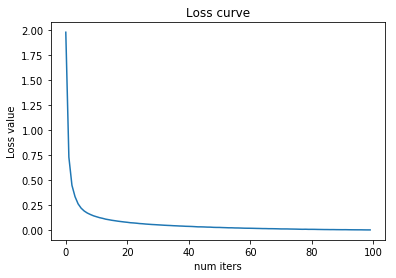

In [80]:
plot_loss(loss_arr)

#### Plotting Accuracy

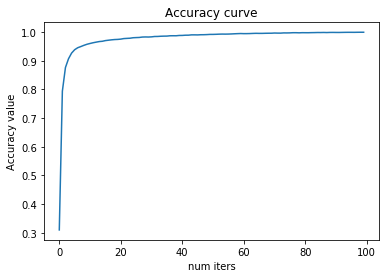

In [81]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [82]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 41us/sample - loss: 0.0943 - acc: 0.9826
Validation Loss: 0.09433380090976676
Validation Accuracy: 0.9826


### Model 4: Leaky Relu

#### Model

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [84]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Train the Model

In [85]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 3s - loss: 0.3006 - acc: 0.9104
Epoch 2/100
55000/55000 - 3s - loss: 0.1370 - acc: 0.9584
Epoch 3/100
55000/55000 - 3s - loss: 0.0985 - acc: 0.9696
Epoch 4/100
55000/55000 - 3s - loss: 0.0795 - acc: 0.9751
Epoch 5/100
55000/55000 - 3s - loss: 0.0636 - acc: 0.9799
Epoch 6/100
55000/55000 - 3s - loss: 0.0533 - acc: 0.9830
Epoch 7/100
55000/55000 - 3s - loss: 0.0443 - acc: 0.9864
Epoch 8/100
55000/55000 - 3s - loss: 0.0388 - acc: 0.9877
Epoch 9/100
55000/55000 - 3s - loss: 0.0332 - acc: 0.9892
Epoch 10/100
55000/55000 - 3s - loss: 0.0274 - acc: 0.9915
Epoch 11/100
55000/55000 - 3s - loss: 0.0225 - acc: 0.9934
Epoch 12/100
55000/55000 - 3s - loss: 0.0192 - acc: 0.9942
Epoch 13/100
55000/55000 - 3s - loss: 0.0163 - acc: 0.9952
Epoch 14/100
55000/55000 - 3s - loss: 0.0140 - acc: 0.9959
Epoch 15/100
55000/55000 - 3s - loss: 0.0091 - acc: 0.9980
Epoch 16/100
55000/55000 - 3s - loss: 0.0090 - acc: 0.9975
Epoch 17/100
55000/55000 - 3s - loss: 0.0081 - acc: 0.9977
Epoch 

#### Plotting Loss

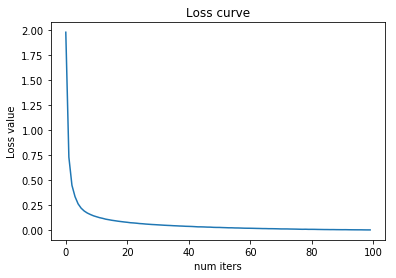

In [86]:
plot_loss(loss_arr)

#### Plotting Accuracy

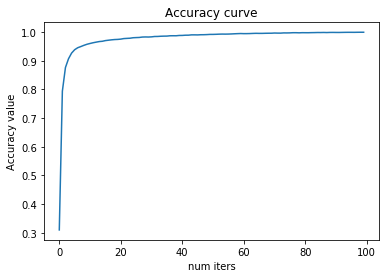

In [87]:
plot_acc(acc_arr)

#### Validation Loss and Accuracy

In [88]:
val_loss, val_acc = model.evaluate(X_val_n.astype(np.float32), Y_val)
print('Validation Loss: ' + str(val_loss))
print('Validation Accuracy: ' + str(val_acc))

5000/5000 [==============================] - 0s 42us/sample - loss: 0.1151 - acc: 0.9806
Validation Loss: 0.115072031714482
Validation Accuracy: 0.9806


## Summary of Models - V

1. **Model1**: Activation function = sigmoid - Loss: 0.081, Acc: 0.981
2. **Model2**: Activation function = tanh - Loss: 0.100, Acc: 0.979
3. **Model3**: Activation function = relu - Loss: 0.094, Acc: 0.983
4. **Model4**: Activation function = leaky relu - Loss: 0.115, Acc: 0.981

Although we may observe that the sigmoid function has a lower loss value than the relu, we have chosen relu not just because it has a slighly better accuracy than sigmoid, but because it was able to achieve a training loss of 7e-5 while sigmoid was able to achieve 0.19, hence the training loss achieved by relu is much smaller than that of sigmoid.

## Conclusion

Hence, we have chosen the relu activation function to among the hyperparameters of the best model

# Best Model

## 2 Hidden Layers, 0.1 Learning rate, relu activation, 128 hidden units per hidden layer

#### Hyperparameters of the best model found

In [89]:
num_hidden_units = 128
learning_rate = 0.1

#### Best Model

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(num_hidden_units, activation = tf.nn.relu),
    tf.keras.layers.Dense(output_size, activation = tf.nn.softmax)
])

In [91]:
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Training the Best Model

In [92]:
info = model.fit(X_train_n.astype(np.float32), Y_train, epochs = num_iters, verbose=2)

Epoch 1/100
55000/55000 - 3s - loss: 0.2906 - acc: 0.9129
Epoch 2/100
55000/55000 - 3s - loss: 0.1259 - acc: 0.9620
Epoch 3/100
55000/55000 - 3s - loss: 0.0885 - acc: 0.9720
Epoch 4/100
55000/55000 - 3s - loss: 0.0668 - acc: 0.9789
Epoch 5/100
55000/55000 - 3s - loss: 0.0522 - acc: 0.9835
Epoch 6/100
55000/55000 - 3s - loss: 0.0423 - acc: 0.9867
Epoch 7/100
55000/55000 - 3s - loss: 0.0332 - acc: 0.9897
Epoch 8/100
55000/55000 - 3s - loss: 0.0269 - acc: 0.9916
Epoch 9/100
55000/55000 - 3s - loss: 0.0215 - acc: 0.9937
Epoch 10/100
55000/55000 - 3s - loss: 0.0165 - acc: 0.9955
Epoch 11/100
55000/55000 - 3s - loss: 0.0138 - acc: 0.9961
Epoch 12/100
55000/55000 - 3s - loss: 0.0114 - acc: 0.9968
Epoch 13/100
55000/55000 - 3s - loss: 0.0093 - acc: 0.9975
Epoch 14/100
55000/55000 - 3s - loss: 0.0052 - acc: 0.9989
Epoch 15/100
55000/55000 - 3s - loss: 0.0038 - acc: 0.9994
Epoch 16/100
55000/55000 - 3s - loss: 0.0020 - acc: 0.9999
Epoch 17/100
55000/55000 - 3s - loss: 0.0013 - acc: 0.9999
Epoch 

#### Obtaining the Test Loss for the Best Model

In [94]:
test_loss, test_acc = model.evaluate(X_test_n.astype(np.float32), Y_test)
print('Test Loss: ' + str(test_loss))
print('Test Accuracy: ' + str(test_acc))

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0970 - acc: 0.9806
Test Loss: 0.09696869913490401
Test Accuracy: 0.9806


## Summary of the Best Model

#### The best model has the following hyperparameters: -

1. It has 2 Hidden Layers
2. Each Hidden Layer has 128 Hidden Units.
3. The Activation Function used in each layer (except the output layer, which uses softmax) is relu
4. The Learning rate used for training was 0.1
5. It was trained on a normalized dataset
6. It was trained for 100 iteration just like all other models in this notebook
7. All parameter initialization was xavier initialization
8. Optimizer used was the SGD optimizer

#### The best model has the following properties: -

1. It is among the smallest training losses and highest training accuracies
2. It is among the smallest validation losses and highest validation accuracies
3. It took 3 seconds per iteration of training time just like all other models

## Conclusion


The Best Model was chosen on the basis of multiple facts which are described above in the properties section of this mardown.